In [1]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
import operator
import itertools
import os
import geopandas as gpd

from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline


In [2]:
path='./Production_Crops_Livestock_E_All_Data.csv'
df = pd.read_csv(path, encoding="ISO-8859-1")

In [3]:
corine_list=[]
for i in [2015,2016,2017,2018,2019]:
    path = os.path.join("./corine_data/",str(i)+'.csv')
    cf = pd.read_csv(path)
    cf = cf.drop(['Class_200','Class_100','Class_20','Class_30','Class_50','Class_60','Class_70', 'Class_sum','Class_0','Class_90','Class_80','system:index','id'],axis=1)
    cf['ano'] = i
    corine_list.append(cf)
    
#print(cf)

In [4]:
corine_df = pd.concat(corine_list , axis= 0)
corine_df = corine_df.reset_index (drop=True)

In [5]:
temp = []
for i in list(df['Area'].unique()):
    if i not in list(corine_df['name'].unique()):
        temp.append(i)

In [6]:
for i in range(len(df["Area"].unique())):
    if '(' in df["Area"].unique()[i]:
        print(df["Area"].unique()[i])

Bolivia (Plurinational State of)
Iran (Islamic Republic of)
Micronesia (Federated States of)
Sudan (former)
Venezuela (Bolivarian Republic of)
European Union (27)


In [7]:
#sorted(corine_df['name'].unique())

Precisamos arrumar os nomes da Fao e verificar se tem todos na corine 
Vamos corrigir os paises que tem "(" no nome ;
Alem desses os seguintes paises serao corrigidos:  "Democratic People's Republic of Korea",'Ethiopia PDR', 
'Republic of Korea','Russian Federation','Syrian Arab Republic', 'United Kingdom of Great Britain and Northern Ireland',
 'Viet Nam',
Os outros paises nao serao considerados

In [8]:
###Criando dicionario para os outros paise
replacer2={"Bolivia (Plurinational State of)":'Bolivia',
           "Iran (Islamic Republic of)":'Iran',
           "Sudan (former)":'Sudan',
           "Venezuela (Bolivarian Republic of)":"Venezuela",
           "Democratic People's Republic of Korea": 'North Korea',
           'Ethiopia PDR':'Ethiopia', 
           'Republic of Korea': 'South Korea',
           'Russian Federation':'Russia',
           'Syrian Arab Republic':'Syria',
           'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
           'Viet Nam':'Vietnam'}

In [9]:
df=df.replace({"Area": replacer2})

In [10]:
temp2=[]
for i in list(df['Area'].unique()):
    if i not in list(corine_df['name'].unique()):
        temp2.append(i)

In [11]:
####Paises que tem nos dados da Fao mas nao tem na corine 
### Iremos ignorar esses paises
### Para china iremos usar o calor china dos dados da FAO e ignorar as outras chinas
temp2

['Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belgium-Luxembourg',
 'Brunei Darussalam',
 'Cabo Verde',
 'China Hong Kong SAR',
 'China Macao SAR',
 'China mainland',
 'China Taiwan Province of',
 'Comoros',
 'Congo',
 'Cook Islands',
 "Cï¿½te d'Ivoire",
 'Czechia',
 'Czechoslovakia',
 'Dominica',
 'Eswatini',
 'Faroe Islands',
 'French Guyana',
 'French Polynesia',
 'Grenada',
 'Guadeloupe',
 'Guinea-Bissau',
 'Kiribati',
 "Lao People's Democratic Republic",
 'Maldives',
 'Marshall Islands',
 'Martinique',
 'Mauritius',
 'Micronesia (Federated States of)',
 'Nauru',
 'Niue',
 'North Macedonia',
 'Palestine',
 'Republic of Moldova',
 'Rï¿½union',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'Sao Tome and Principe',
 'Serbia',
 'Serbia and Montenegro',
 'Seychelles',
 'Singapore',
 'Timor-Leste',
 'Tokelau',
 'Tonga',
 'Tuvalu',
 'USSR',
 'Yugoslav SFR',
 'World',
 'Africa',
 'Eastern Africa',
 'Middle Africa',
 'Northern Afr

In [12]:
def get_data(df,item,element):
    
    ano_int = lambda x: int(x.replace('Y',''))
   
    df= df[(df['Item']==item) & (df['Element']==element)]
    df=df.drop(['Item','Area Code','Item Code','Element Code','Element','Unit'],axis=1)
    df=df.reset_index(drop=True)
    df=df.T.reset_index()
    df.columns=df.iloc[0]
    df2=df.rename({'Area': 'data'}, axis=1) 

    df2=df2[1:]
    df2=df2.iloc[::2]
    df2['Ano']=df2['data'].map(ano_int)
    df2=df2.drop('data',axis=1).apply(pd.to_numeric)
    df2=df2.set_index('Ano')

    return df2
   

In [13]:
df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China Hong Kong SAR', 'China Macao SAR', 'China mainland',
       'China Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', "Cï¿½te d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia', 'North Korea',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       '

Como podemos ver, no Dataframe temos areas para alem dos paises, como continentes 
Vamos separa os paises do resto 

In [14]:
countris_list = df['Area'].unique()[0:209]
continent_list = df['Area'].unique()[209:]
all_list = df.Area.unique()

# print(all_list)

In [15]:
print(df)

       Area Code                                     Area  Item Code  \
0              2                              Afghanistan        221   
1              2                              Afghanistan        221   
2              2                              Afghanistan        221   
3              2                              Afghanistan        711   
4              2                              Afghanistan        711   
...          ...                                      ...        ...   
77518       5817  Net Food Importing Developing Countries       1729   
77519       5817  Net Food Importing Developing Countries       1729   
77520       5817  Net Food Importing Developing Countries       1735   
77521       5817  Net Food Importing Developing Countries       1735   
77522       5817  Net Food Importing Developing Countries       1735   

                                Item  Element Code         Element    Unit  \
0                 Almonds with shell          5312  Area 

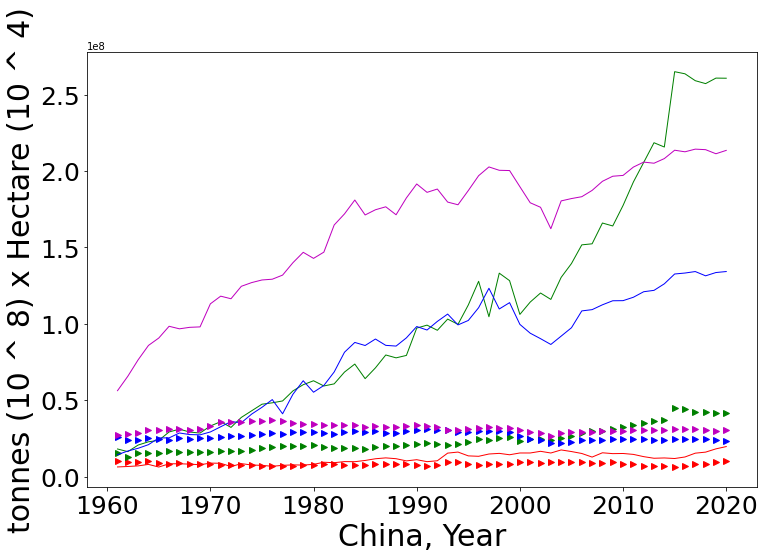

In [16]:
plt.figure(figsize=(12,8)) 


plt.plot(get_data(df,'Soybeans',('Area harvested'))['China'], 'r>', label='Soybeam Area Planted', linewidth = '1')
plt.plot(get_data(df,'Soybeans','Production')['China'], 'r-', label='Soybeam Production', linewidth = '1')
plt.plot(get_data(df,'Maize','Area harvested')['China'], 'g>',label='Maize Area Planted', linewidth = '1')
plt.plot(get_data(df,'Maize','Production')['China'], 'g-', label='Maize Production', linewidth = '1')
plt.plot(get_data(df,'Wheat','Area harvested')['China'], 'b>',label='Wheat Area Planted', linewidth = '1')
plt.plot(get_data(df,'Wheat','Production')['China'], 'b-', label='Wheat Production', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Area harvested')['China'], 'm>',label='Rice Area Planted', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Production')['China'], 'm-', label='Rice Production', linewidth = '1')

# plt.legend(fontsize=15, prop={'size': 15} )
plt.xlabel('China, Year', fontsize=30)
plt.ylabel('tonnes (10 ^ 8) x Hectare (10 ^ 4)', fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.savefig('plot_CH_productionAll.png', dpi=400)

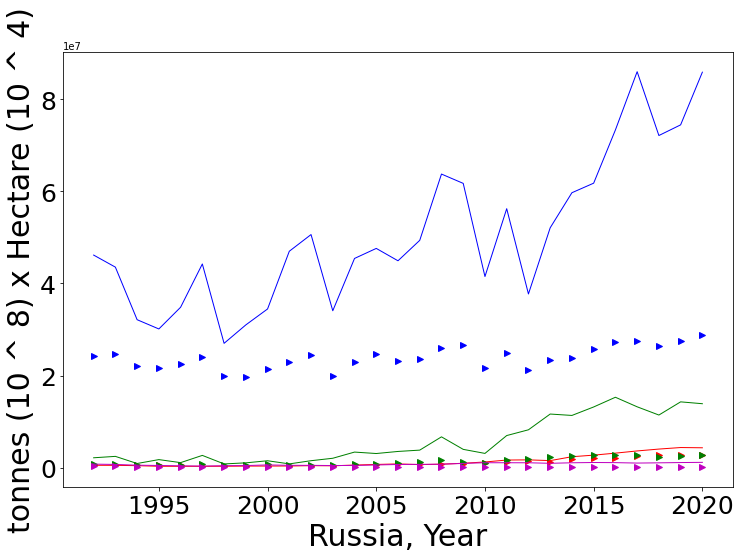

In [17]:
plt.figure(figsize=(12,8)) 


plt.plot(get_data(df,'Soybeans',('Area harvested'))['Russia'], 'r>', label='Soybeam Area Planted', linewidth = '1')
plt.plot(get_data(df,'Soybeans','Production')['Russia'], 'r-', label='Soybeam Production', linewidth = '1')
plt.plot(get_data(df,'Maize','Area harvested')['Russia'], 'g>',label='Maize Area Planted', linewidth = '1')
plt.plot(get_data(df,'Maize','Production')['Russia'], 'g-', label='Maize Production', linewidth = '1')
plt.plot(get_data(df,'Wheat','Area harvested')['Russia'], 'b>',label='Wheat Area Planted', linewidth = '1')
plt.plot(get_data(df,'Wheat','Production')['Russia'], 'b-', label='Wheat Production', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Area harvested')['Russia'], 'm>',label='Rice Area Planted', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Production')['Russia'], 'm-', label='Rice Production', linewidth = '1')

# plt.legend(fontsize=15, prop={'size': 15} )
plt.xlabel('Russia, Year', fontsize=30)
plt.ylabel('tonnes (10 ^ 8) x Hectare (10 ^ 4)', fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.savefig('plot_RS_productionAll.png', dpi=400)

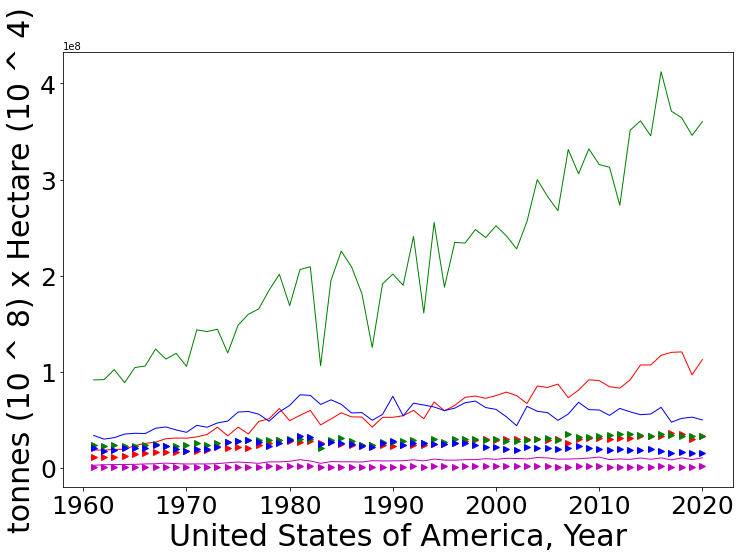

In [18]:
plt.figure(figsize=(12,8)) 


plt.plot(get_data(df,'Soybeans',('Area harvested'))['United States of America'], 'r>', label='Soybeam Area Planted', linewidth = '1')
plt.plot(get_data(df,'Soybeans','Production')['United States of America'], 'r-', label='Soybeam Production', linewidth = '1')
plt.plot(get_data(df,'Maize','Area harvested')['United States of America'], 'g>',label='Maize Area Planted', linewidth = '1')
plt.plot(get_data(df,'Maize','Production')['United States of America'], 'g-', label='Maize Production', linewidth = '1')
plt.plot(get_data(df,'Wheat','Area harvested')['United States of America'], 'b>',label='Wheat Area Planted', linewidth = '1')
plt.plot(get_data(df,'Wheat','Production')['United States of America'], 'b-', label='Wheat Production', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Area harvested')['United States of America'], 'm>',label='Rice Area Planted', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Production')['United States of America'], 'm-', label='Rice Production', linewidth = '1')

# plt.legend(fontsize=15, prop={'size': 15} )
plt.xlabel('United States of America, Year', fontsize=30)
plt.ylabel('tonnes (10 ^ 8) x Hectare (10 ^ 4)', fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.savefig('plot_US_productionAll.png', dpi=400)

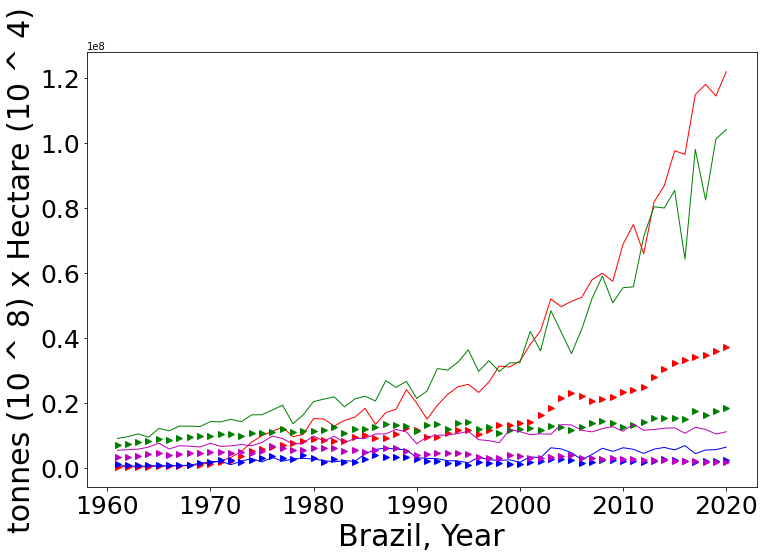

In [19]:
plt.figure(figsize=(12,8)) 


plt.plot(get_data(df,'Soybeans',('Area harvested'))['Brazil'], 'r>', label='Soybeam Area Planted', linewidth = '1')
plt.plot(get_data(df,'Soybeans','Production')['Brazil'], 'r-', label='Soybeam Production', linewidth = '1')
plt.plot(get_data(df,'Maize','Area harvested')['Brazil'], 'g>',label='Maize Area Planted', linewidth = '1')
plt.plot(get_data(df,'Maize','Production')['Brazil'], 'g-', label='Maize Production', linewidth = '1')
plt.plot(get_data(df,'Wheat','Area harvested')['Brazil'], 'b>',label='Wheat Area Planted', linewidth = '1')
plt.plot(get_data(df,'Wheat','Production')['Brazil'], 'b-', label='Wheat Production', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Area harvested')['Brazil'], 'm>',label='Rice Area Planted', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Production')['Brazil'], 'm-', label='Rice Production', linewidth = '1')

# plt.legend(fontsize=15, prop={'size': 15} )
plt.xlabel('Brazil, Year', fontsize=30)
plt.ylabel('tonnes (10 ^ 8) x Hectare (10 ^ 4)', fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.savefig('plot_BR_productionAll.png', dpi=400)

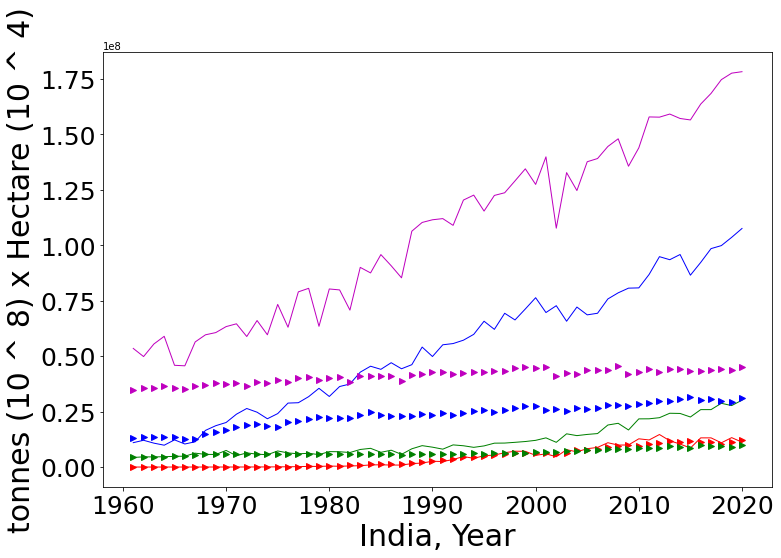

In [20]:
plt.figure(figsize=(12,8)) 


plt.plot(get_data(df,'Soybeans',('Area harvested'))['India'], 'r>', label='Soybeam Area Planted', linewidth = '1')
plt.plot(get_data(df,'Soybeans','Production')['India'], 'r-', label='Soybeam Production', linewidth = '1')
plt.plot(get_data(df,'Maize','Area harvested')['India'], 'g>',label='Maize Area Planted', linewidth = '1')
plt.plot(get_data(df,'Maize','Production')['India'], 'g-', label='Maize Production', linewidth = '1')
plt.plot(get_data(df,'Wheat','Area harvested')['India'], 'b>',label='Wheat Area Planted', linewidth = '1')
plt.plot(get_data(df,'Wheat','Production')['India'], 'b-', label='Wheat Production', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Area harvested')['India'], 'm>',label='Rice Area Planted', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Production')['India'], 'm-', label='Rice Production', linewidth = '1')

# plt.legend(fontsize=15, prop={'size': 15} )
plt.xlabel('India, Year', fontsize=30)
plt.ylabel('tonnes (10 ^ 8) x Hectare (10 ^ 4)', fontsize=30)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.savefig('plot_IN_productionAll.png', dpi=400)

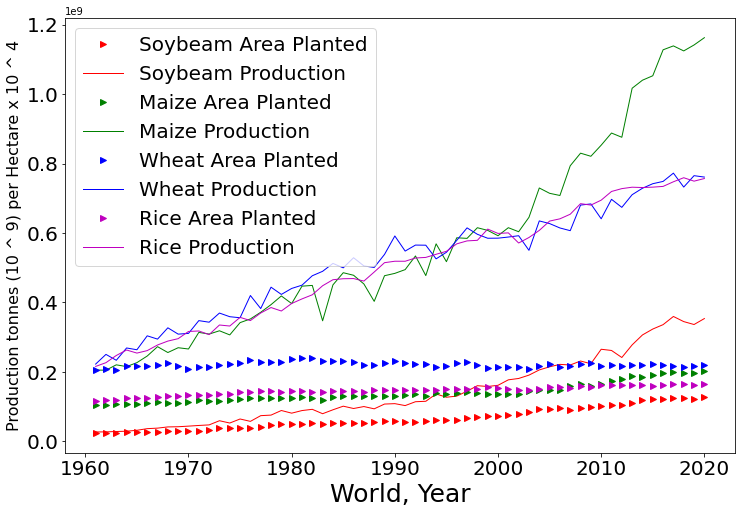

In [21]:
plt.figure(figsize=(12,8)) 


plt.plot(get_data(df,'Soybeans',('Area harvested'))['World'], 'r>', label='Soybeam Area Planted', linewidth = '1')
plt.plot(get_data(df,'Soybeans','Production')['World'], 'r-', label='Soybeam Production', linewidth = '1')
plt.plot(get_data(df,'Maize','Area harvested')['World'], 'g>',label='Maize Area Planted', linewidth = '1')
plt.plot(get_data(df,'Maize','Production')['World'], 'g-', label='Maize Production', linewidth = '1')
plt.plot(get_data(df,'Wheat','Area harvested')['World'], 'b>',label='Wheat Area Planted', linewidth = '1')
plt.plot(get_data(df,'Wheat','Production')['World'], 'b-', label='Wheat Production', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Area harvested')['World'], 'm>',label='Rice Area Planted', linewidth = '1')
plt.plot(get_data(df,'Rice paddy','Production')['World'], 'm-', label='Rice Production', linewidth = '1')

plt.legend(fontsize=15, prop={'size': 20} )
plt.xlabel('World, Year', fontsize=25)
plt.ylabel('Production tonnes (10 ^ 9) per Hectare x 10 ^ 4', fontsize=16)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

plt.savefig('plot_World_productionAll.png', dpi=400)

In [22]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,Afghanistan,221,Almonds with shell,5312,Area harvested,ha,NaN,NaN,NaN,...,19481.0,NaN,19793.0,NaN,20053.0,NaN,29203.0,NaN,22134.0,NaN
1,2,Afghanistan,221,Almonds with shell,5419,Yield,hg/ha,NaN,NaN,NaN,...,16859.0,Fc,13788.0,Fc,17161.0,Fc,13083.0,Fc,17759.0,Fc
2,2,Afghanistan,221,Almonds with shell,5510,Production,tonnes,NaN,NaN,NaN,...,32843.0,NaN,27291.0,NaN,34413.0,NaN,38205.0,NaN,39307.0,NaN
3,2,Afghanistan,711,Anise badian fennel coriander,5312,Area harvested,ha,NaN,M,NaN,...,24500.0,Im,26500.0,Im,25333.0,Im,25444.0,Im,25759.0,Im
4,2,Afghanistan,711,Anise badian fennel coriander,5419,Yield,hg/ha,NaN,NaN,NaN,...,7075.0,Fc,7149.0,Fc,7142.0,Fc,7123.0,Fc,7138.0,Fc


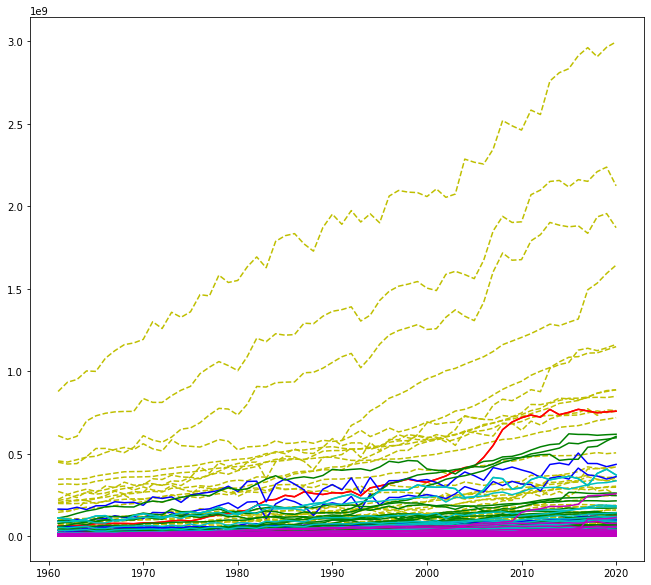

In [23]:
plt.figure(figsize=(11,10))
for i in list(df[(df['Area']=='World') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['World'], 'y--',label= 'World')
for i in list(df[(df['Area']=='Brazil') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['Brazil'], 'r-', label='A/P')
for i in list(df[(df['Area']=='United States of America') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['United States of America'],'b-', label=i)
for i in list(df[(df['Area']=='China') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['China'], 'g-',label=i)
for i in list(df[(df['Area']=='India') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['India'], 'c-',label=i)  
for i in list(df[(df['Area']=='Indonesia') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['Indonesia'], 'm-',label=i)
# plt.savefig('plot_World_productionAll2.png', dpi=300)

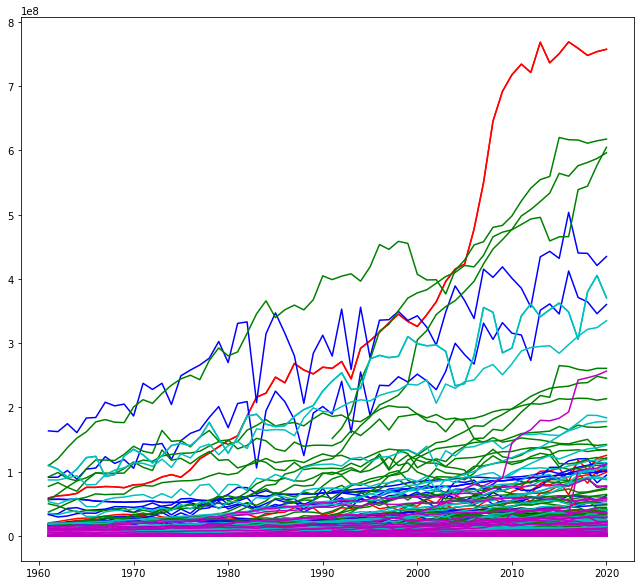

In [24]:
plt.figure(figsize=(11,10))
# for i in list(df[(df['Area']=='World') & (df['Element']=='Production')].Item.unique()):
#     plt.plot(get_data(df,i,'Production')['World'], 'y--',label= 'World')
for i in list(df[(df['Area']=='Brazil') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['Brazil'], 'r-', label='A/P')
for i in list(df[(df['Area']=='United States of America') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['United States of America'],'b-', label=i)
for i in list(df[(df['Area']=='China') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['China'], 'g-',label=i)
for i in list(df[(df['Area']=='India') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['India'], 'c-',label=i)  
for i in list(df[(df['Area']=='Indonesia') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['Indonesia'], 'm-',label=i)
# plt.savefig('plot_World_productionAll2.png', dpi=300)

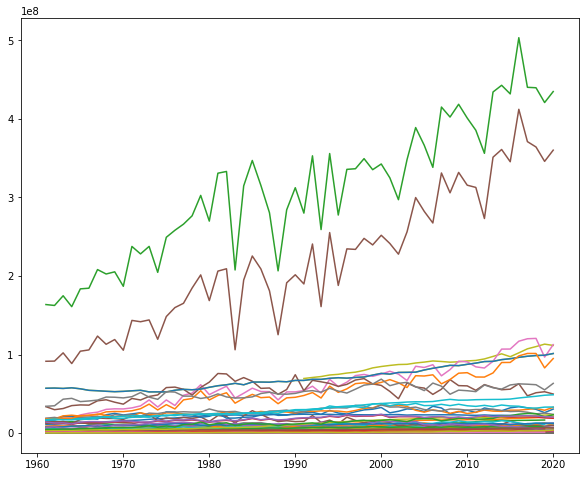

In [25]:
plt.figure(figsize=(10,8)) 
for i in list(df[(df['Area']=='United States of America') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['United States of America'], label=i)

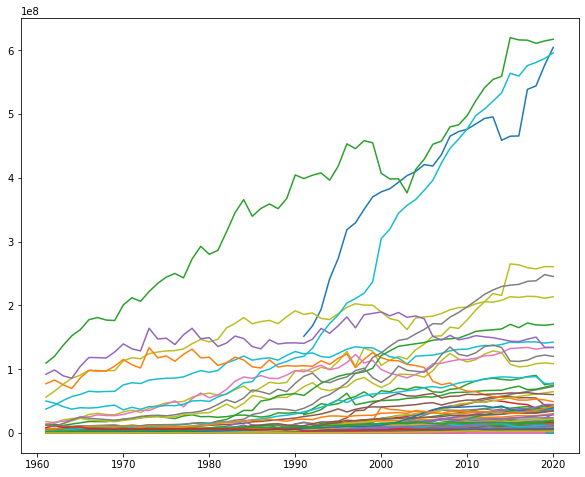

In [26]:
plt.figure(figsize=(10,8)) 
for i in list(df[(df['Area']=='China') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['China'], label=i)

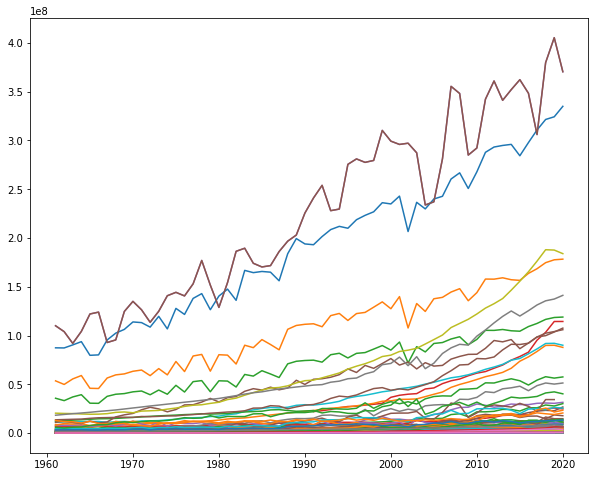

In [27]:
plt.figure(figsize=(10,8)) 
for i in list(df[(df['Area']=='India') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['India'], label=i)

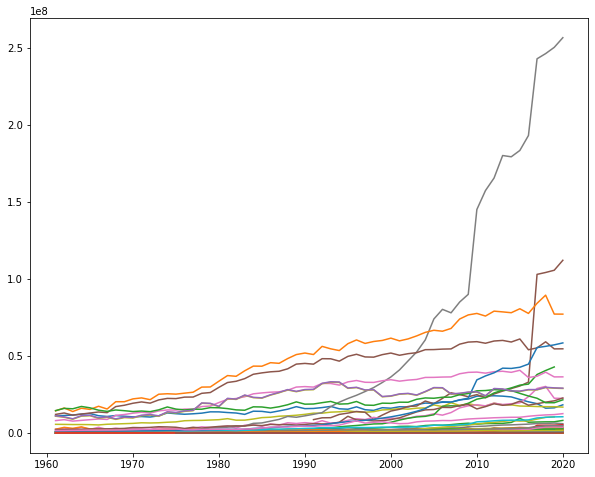

In [28]:
plt.figure(figsize=(10,8)) 
for i in list(df[(df['Area']=='Indonesia') & (df['Element']=='Production')].Item.unique()):
    plt.plot(get_data(df,i,'Production')['Indonesia'], label=i)

Craindo dicionario com os valores de produção por alimento e pais 

In [29]:
prod_dict={}

item_list=['Wheat','Maize','Rice, paddy','Soybeans']
for i in item_list:
    paises_alimento = np.array(get_data(df,i,'Production').columns.to_list())
    temp_dict={}
    for c in paises_alimento:
        temp_dict[c]=get_data(df,i,'Production')[c][-6:]
    
    prod_dict[i]=temp_dict

###Vamos checar se os valores estao corretos 

Vamos criar um dicionario com o somatorio dos 4 alimentos para cada pais

In [30]:
item_list=['Wheat','Maize','Rice paddy','Soybeans']
world_prod={}
for w in sorted(countris_list) :
    temp_list=[]
    for c in [2015,2016,2017,2018,2019]:
        soma=0
        for i in item_list:
            try:
                x=prod_dict[i][w][c]
                soma=soma+x
            except:
                pass
        temp_list.append(soma)
    
    world_prod[w]=temp_list

In [31]:
item_list=['Wheat','Maize','Rice, paddy','Soybeans']
world_prod={}
for w in sorted(countris_list):
    temp_list=[]
    for c in [2015,2016,2017,2018,2019]:
        soma=0
        for i in item_list:
            try:
                x=prod_dict[i][w][c]
                soma=soma+x
            except:
                pass
        
        temp_list.append(soma)
        temp_array=np.array(temp_list)
        where_are_NaNs = np.isnan(temp_array)
        temp_array[where_are_NaNs] = 0
    world_prod[w]=temp_array
    
#print(x)

Vamos fazer a soma das classes de foresta no dataframe corine

In [32]:
corine_df['forest']=corine_df[corine_df.columns.tolist()[1:13]].sum(axis=1)

In [33]:
norm = world_prod['China'][4]
norm

412663569.0

Vamos ver o valor de P para 2015 para os paises

In [34]:
p_dict={}
for i in list(countris_list):
    temp=[]
    for j in list(range(5)):
        p=world_prod[i][j]/(norm+0.00001)
        temp.append(p)
    p_dict[i]=temp

In [35]:
a_dict={}
for i in list(countris_list):
    if i in corine_df['name'].unique():
        temp=[]
        for j in list(range(5)):
            a=float(corine_df.loc[corine_df['name']==i].iloc[j]['Class_40'])
            temp.append(a)
        a_dict[i]=temp

In [36]:
v_dict={}
for i in list(countris_list):
    if i in corine_df['name'].unique():
        temp=[]
        for j in list(range(5)):
            v=float(corine_df.loc[corine_df['name']==i].iloc[j]['forest'])
            temp.append(v)
        v_dict[i]=temp

In [37]:
for i in ['Brazil','China','India','Indonesia','United States of America']:
    print(i,v_dict[i])

Brazil [0.5851300875176487, 0.5844974150884092, 0.5840028093761946, 0.5836722731716826, 0.5842228092809392]
China [0.256408196554299, 0.2562719965599864, 0.2561369703867806, 0.2560537437155912, 0.25600200130395423]
India [0.23252888948639797, 0.23248503372699353, 0.23245087181950574, 0.232387776426406, 0.2322901350759497]
Indonesia [0.84289044534298, 0.8423757000280667, 0.8416064414010203, 0.8412396597566449, 0.841660312653246]
United States of America [0.37492974176842475, 0.374179751609139, 0.37379617915793606, 0.37343240691179636, 0.37359323726851845]


In [38]:
a_df=pd.DataFrame(a_dict).fillna(0)
v_df=pd.DataFrame(v_dict).fillna(0)
p_df=pd.DataFrame(p_dict)[v_df.columns.tolist()].fillna(0)

In [39]:
favi=(p_df/a_df)*v_df

In [40]:
favi.head()

,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bangladesh,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,0.002832,0.004709,0.002468,0.068632,0.232152,0.000894,0.289204,0.019567,0.001614,0.003618,...,0.032873,3.007565,0.008186,0.000000,inf,0.096892,0.036971,0.000055,0.056003,0.002874
1,0.002751,0.004711,0.002261,0.081683,0.233040,0.000863,0.267643,0.024052,0.001766,0.003796,...,0.034234,3.497436,0.006700,0.000300,inf,0.103278,0.037214,0.000044,0.060415,0.002376
2,0.002499,0.004721,0.002227,0.087541,0.260107,0.000436,0.401043,0.020719,0.001747,0.004332,...,0.036981,3.176673,0.007383,0.000260,inf,0.086296,0.036144,0.000044,0.075983,0.006356
3,0.002026,0.004553,0.003555,0.101422,0.209799,0.000455,0.263635,0.020594,0.001948,0.004389,...,0.034844,3.152840,0.003366,0.000232,inf,0.119211,0.034565,0.000041,0.051483,0.006620
4,0.002718,0.004486,0.003446,0.103412,0.275986,0.000274,0.221694,0.022993,0.002084,0.004592,...,0.031474,2.912560,0.007382,0.000259,inf,0.106155,0.033686,0.000047,0.044633,0.002422


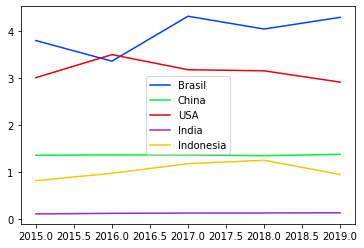

In [41]:
year=[2015,2016,2017,2018,2019]
plt.style.use('seaborn-bright')
plt.plot(year,favi['Brazil'],label='Brasil')
plt.plot(year,favi['China'],label='China')
plt.plot(year,favi['United States of America'],label='USA')
plt.plot(year,favi['India'], label='India')
plt.plot(year,favi['Indonesia'], label='Indonesia')
plt.legend()

Corrigir valores que deram inf

In [42]:
favi.T.head(156)

,0,1,2,3,4
Afghanistan,0.002832,0.002751,0.002499,0.002026,0.002718
Albania,0.004709,0.004711,0.004721,0.004553,0.004486
Algeria,0.002468,0.002261,0.002227,0.003555,0.003446
Angola,0.068632,0.081683,0.087541,0.101422,0.103412
Argentina,0.232152,0.233040,0.260107,0.209799,0.275986
...,...,...,...,...,...
Venezuela,0.096892,0.103278,0.086296,0.119211,0.106155
Vietnam,0.036971,0.037214,0.036144,0.034565,0.033686
Yemen,0.000055,0.000044,0.000044,0.000041,0.000047
Zambia,0.056003,0.060415,0.075983,0.051483,0.044633


In [43]:
np.where(np.array(favi)==21.454897612634003)

(array([], dtype=int64), array([], dtype=int64))

In [44]:
np.where(np.isinf(np.array(favi)))

(array([0, 1, 2, 3, 4]), array([150, 150, 150, 150, 150]))

In [45]:
remove=['Brazil','Suriname','Liberia','Gabon']
plot_list=list(set(favi.columns.tolist())-set(remove))

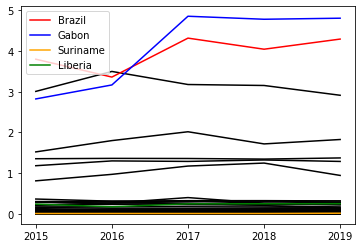

In [46]:
for i in plot_list:
    plt.plot(year,favi[i],'black')
plt.plot(year,favi['Brazil'],'r',label='Brazil')
plt.plot(year,favi['Gabon'],'b',label='Gabon')
plt.plot(year,favi['Suriname'],'orange',label='Suriname')
plt.plot(year,favi['Liberia'],'green',label='Liberia')
plt.xticks(year)
plt.legend()

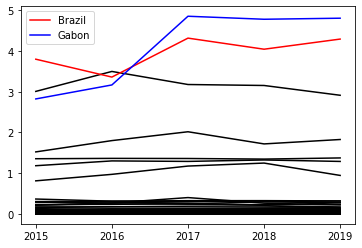

In [47]:
for i in plot_list:
    plt.plot(year,favi[i],'black')
plt.plot(year,favi['Brazil'],'r',label='Brazil')
plt.plot(year,favi['Gabon'],'b',label='Gabon')
plt.xticks(year)
plt.legend()

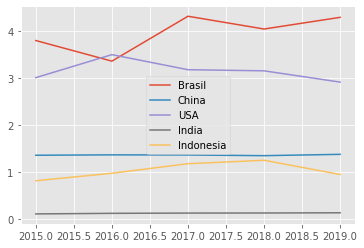

In [48]:
year=[2015,2016,2017,2018,2019]
plt.style.use('ggplot')
plt.plot(year,favi['Brazil'],label='Brasil')
plt.plot(year,favi['China'],label='China')
plt.plot(year,favi['United States of America'],label='USA')
plt.plot(year,favi['India'], label='India')
plt.plot(year,favi['Indonesia'], label='Indonesia')
plt.legend()

In [49]:
remove2=['Solomon Islands','Vanuatu']
col_mean=list(set(favi.columns.tolist())-set(remove2))

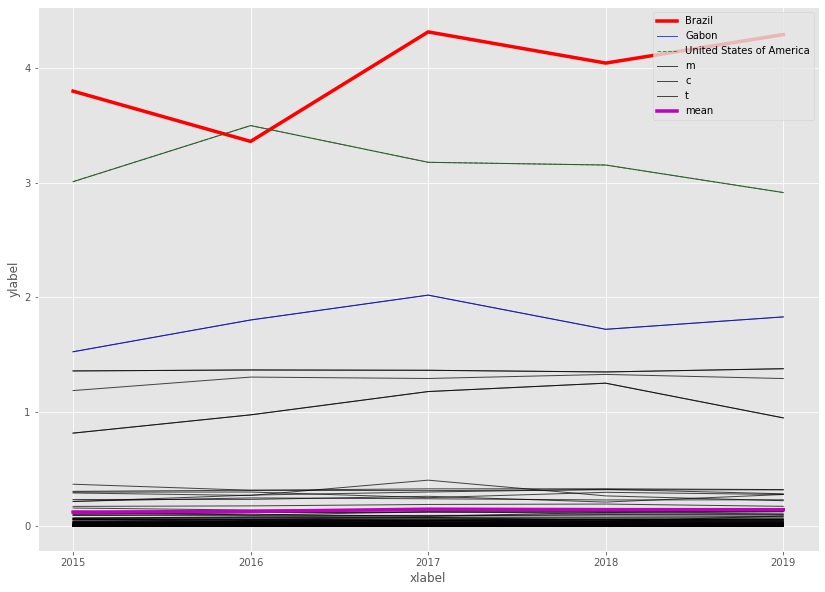

In [50]:
plt.figure(figsize=(14,10)) 
for i in plot_list:
    plt.plot(year,favi[i],'black',alpha=0.7, linewidth=1)
plt.plot(year,favi['Brazil'],'r',label='Brazil',linewidth=3.5)
plt.plot(year,favi['Russia'],'b',label='Gabon',alpha=0.7,linewidth=1)
plt.plot(year,favi['United States of America'],'g',label='United States of America',alpha=0.7,linewidth=1,linestyle='dashed')
plt.plot(year,favi['China'],'black',label='m',alpha=0.7,linewidth=1)
plt.plot(year,favi['India'],'black',label='c',alpha=0.7,linewidth=1,)
plt.plot(year,favi['Indonesia'],'black',label='t',alpha=0.7,linewidth=1)
plt.plot(year,favi[col_mean].mean(axis=1),'m',linewidth=3.5,label='mean')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.xticks(year)
plt.legend()

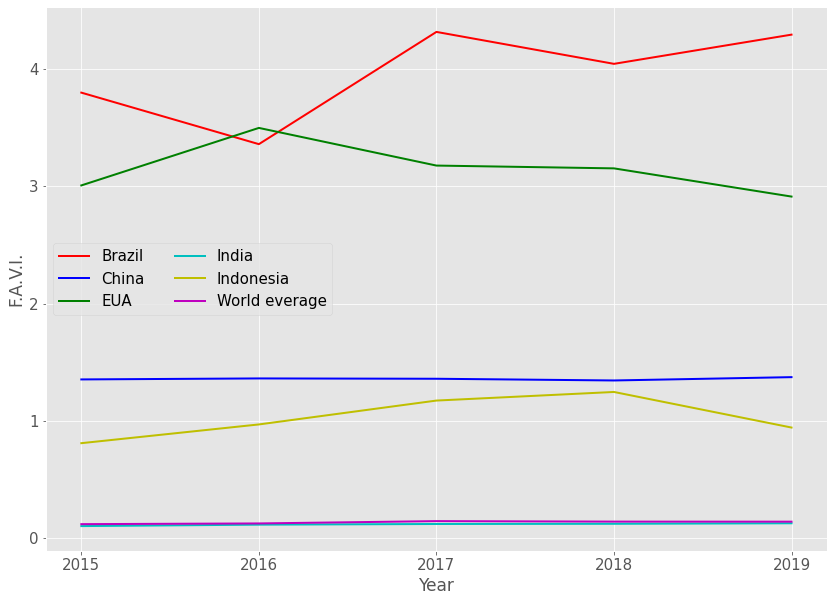

In [51]:
# for i in plot_list:
#     plt.plot(year,favi[i],'black',alpha=0.5, linewidth=0.5,linestyle='dashed')
plt.figure(figsize=(14,10)) 
plt.plot(year,favi['Brazil'],'r',label = 'Brazil',linewidth=2)
plt.plot(year,favi['China'], 'b', label = 'China',linewidth=2)
plt.plot(year,favi['United States of America'],'g' , label = 'EUA',linewidth=2)
plt.plot(year,favi['India'], 'c', label = 'India',linewidth=2)
plt.plot(year,favi['Indonesia'], 'y', label = 'Indonesia',linewidth=2)
plt.plot(year,favi[col_mean].mean(axis= 1),'m',linewidth=2,label='World everage')
plt.xlabel('Year', fontsize=17)
plt.xticks(year, fontsize=15)
plt.ylabel('F.A.V.I.', fontsize=17)
plt.yticks(fontsize=15)
plt.legend(fontsize=15, ncol=2, loc='center left')
# plt.savefig('plot_export.png', dpi=300)


In [52]:
teste = favi[col_mean].T.rename({0:'2015',1:'2016', 2:'2017', 3: '2018', 4: '2019'},axis=1)
teste = teste.reset_index()

In [53]:
teste['2019']

0      0.000003
1      0.000000
2      4.292034
3      0.000170
4      0.033246
         ...   
149    0.000000
150    0.011725
151    1.288534
152    0.000077
153    0.017143
Name: 2019, Length: 154, dtype: float64

In [54]:
world = gpd.read_file('/ne_10m_admin_0_countries.shp')

In [55]:
FAVI = pd.read_csv('/FAVI.csv')

<AxesSubplot:>

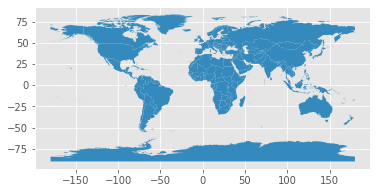

In [56]:
FAVI2 = pd.read_csv('/FAVI.csv', na_values = ['0','-1'])
gdf = gpd.GeoDataFrame(pd.merge(world, FAVI))
world.plot()

In [57]:
df = world[['NAME_LONG','geometry']] 
df.head()

,NAME_LONG,geometry
0,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [58]:
merged = df.set_index('NAME_LONG').join(FAVI.set_index('NAME_LONG'))
#.head() returns the top 5(by default ) lines of the dataframe
merged.head()

,geometry,Unnamed: 0,2015,2016,2017,2018,2019
NAME_LONG,,,,,,,
Afghanistan,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Afghanistan,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",16.0,0.002027,0.001952,0.001778,0.001467,0.001933
Akrotiri,"POLYGON ((33.01563 34.63442, 33.00994 34.62490...",NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Albania,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",NaN,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
Albania,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",151.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [59]:
merged2 = df.set_index('NAME_LONG').join(FAVI2.set_index('NAME_LONG'))
#.head() returns the top 5(by default ) lines of the dataframe
merged2.head()

,geometry,Unnamed: 0,2015,2016,2017,2018,2019
NAME_LONG,,,,,,,
Afghanistan,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,"POLYGON ((74.54235 37.02167, 74.54742 37.01567...",16.0,0.002027,0.001952,0.001778,0.001467,0.001933
Akrotiri,"POLYGON ((33.01563 34.63442, 33.00994 34.62490...",NaN,NaN,NaN,NaN,NaN,NaN
Albania,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",NaN,NaN,NaN,NaN,NaN,NaN
Albania,"POLYGON ((20.56715 41.87318, 20.54172 41.86158...",151.0,NaN,NaN,NaN,NaN,NaN


In [60]:
# fig.savefig('map_export.png', dpi=300)

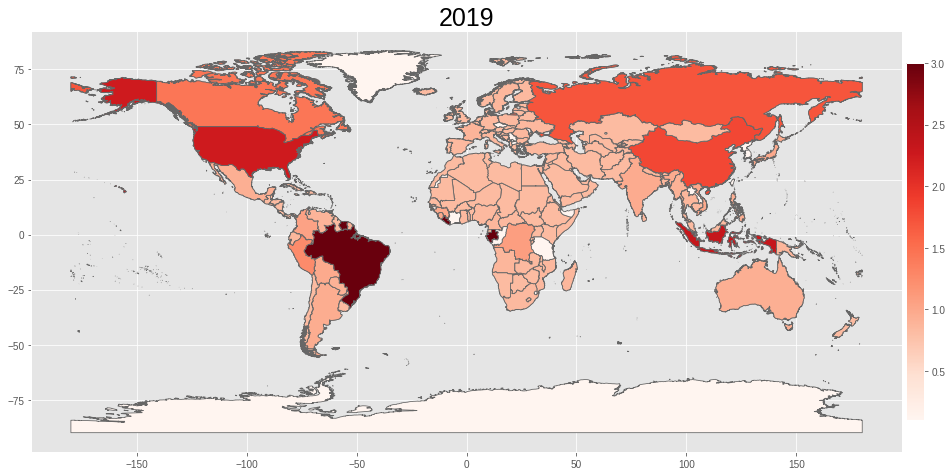

In [61]:
variable1 = '2019'
variable2 = '2018'
variable3 = '2017'
variable4 = '2016'
variable5 = '2015'

vmin, vmax = -1 , 3
fig, ax = plt.subplots(1, figsize=(16, 16))

# Create colorbar as a legend

merged1 = merged.plot(column=variable1, cmap='Reds', ax=ax, linewidth=0.8, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=False)


# fig, ax = plt.subplots(2,2, figsize=(8, 8))
# Create colorbar as a legend

# merged.plot(column=variable2, cmap='Reds', linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add a title
# fig.suptitle('F.A.V.I. Index', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_title('2019', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap = 'Reds', norm=plt.Normalize(vmin=0.1, vmax=vmax, clip=True))
# add the colorbar to the figure
fig.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.005)
figsize=(20, 20)
plt.style.use('seaborn-ticks')
plt.savefig('plot_export2019.png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()


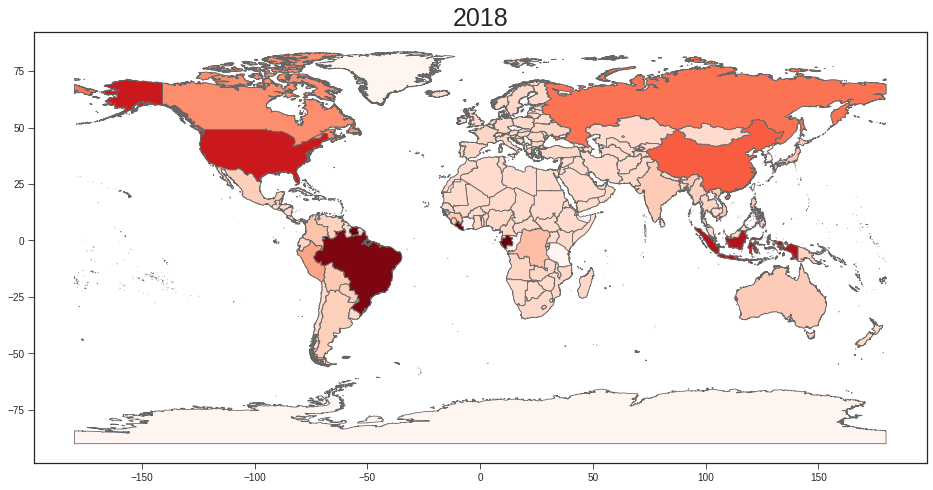

In [62]:
variable1 = '2019'
variable2 = '2018'
variable3 = '2017'
variable4 = '2016'
variable5 = '2015'

vmin, vmax = -0.5 , 3
figsize=(16, 16)
fig, ax = plt.subplots(1, figsize=(16, 16))

# Create colorbar as a legend

merged1 = merged.plot(column=variable2, cmap='Reds', ax=ax, linewidth=0.8, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=False)


# fig, ax = plt.subplots(2,2, figsize=(8, 8))
# Create colorbar as a legend

# merged.plot(column=variable2, cmap='Reds', linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add a title
# fig.suptitle('F.A.V.I. Index', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_title('2018', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0.1, vmax=vmax, clip=True))
# add the colorbar to the figure
# fig.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.005)
figsize=(20, 20)
plt.style.use('seaborn-ticks')
plt.savefig('plot_export2018.png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()

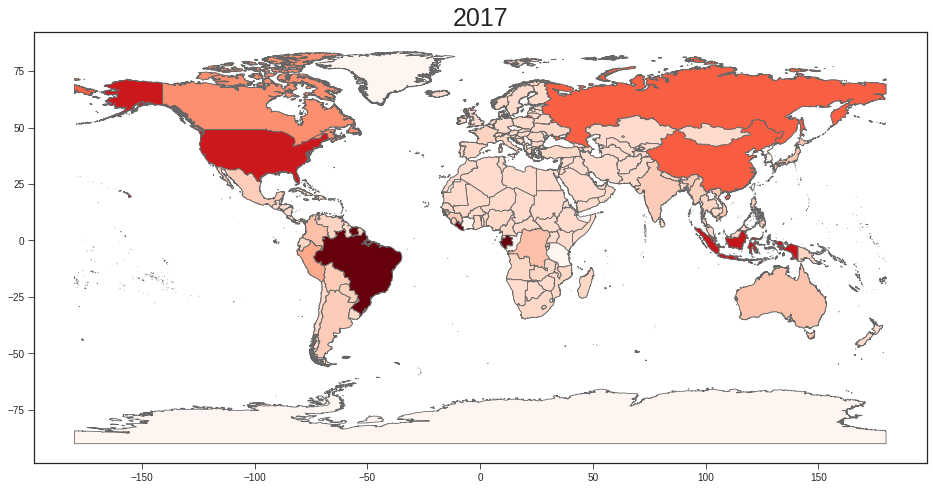

In [63]:
variable1 = '2019'
variable2 = '2018'
variable3 = '2017'
variable4 = '2016'
variable5 = '2015'

vmin, vmax = -0.5 , 3
figsize=(16, 16)
fig, ax = plt.subplots(1, figsize=(16, 16))

# Create colorbar as a legend

merged1 = merged.plot(column=variable3, cmap='Reds', ax=ax, linewidth=0.8, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=False)


# fig, ax = plt.subplots(2,2, figsize=(8, 8))
# Create colorbar as a legend

# merged.plot(column=variable2, cmap='Reds', linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add a title
# fig.suptitle('F.A.V.I. Index', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_title('2017', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0.1, vmax=vmax, clip=True))
# add the colorbar to the figure
# fig.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.005)
figsize=(20, 20)
plt.style.use('seaborn-ticks')
plt.savefig('plot_export2017.png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()

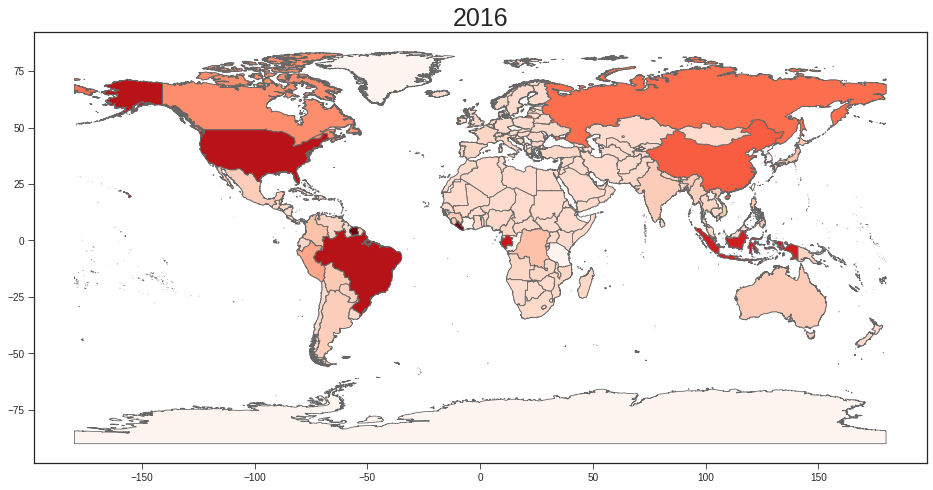

In [64]:
variable1 = '2019'
variable2 = '2018'
variable3 = '2017'
variable4 = '2016'
variable5 = '2015'

vmin, vmax = -0.5 , 3
figsize=(16, 16)
fig, ax = plt.subplots(1, figsize=(16, 16))

# Create colorbar as a legend

merged1 = merged.plot(column=variable4, cmap='Reds', ax=ax, linewidth=0.8, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=False)


# fig, ax = plt.subplots(2,2, figsize=(8, 8))
# Create colorbar as a legend

# merged.plot(column=variable2, cmap='Reds', linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add a title
# fig.suptitle('F.A.V.I. Index', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_title('2016', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0.1, vmax=vmax, clip=True))
# add the colorbar to the figure
# fig.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.005)
figsize=(20, 20)
plt.style.use('seaborn-ticks')
plt.savefig('plot_export2016.png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()

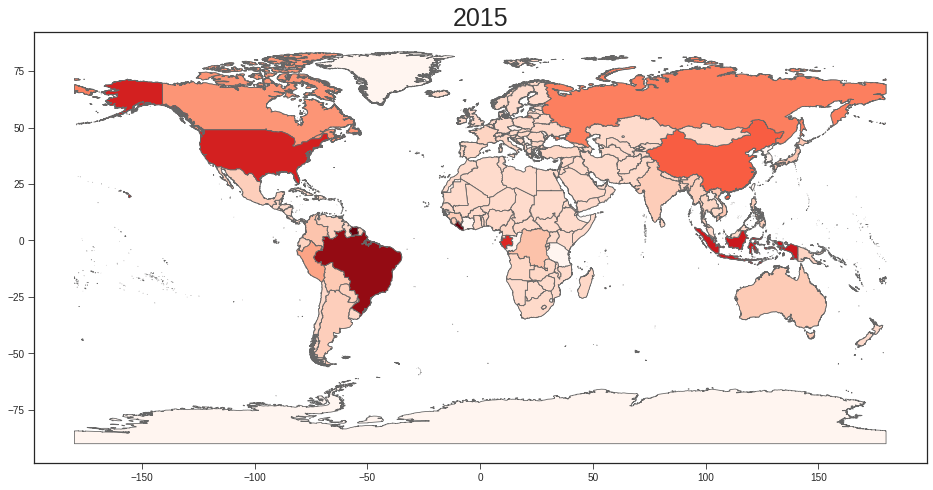

In [65]:
variable1 = '2019'
variable2 = '2018'
variable3 = '2017'
variable4 = '2016'
variable5 = '2015'

vmin, vmax = -0.5 , 3
figsize=(16, 16)
fig, ax = plt.subplots(1, figsize=(16, 16))

# Create colorbar as a legend

merged1 = merged.plot(column=variable5, cmap='Reds', ax=ax, linewidth=0.8, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=False)


# fig, ax = plt.subplots(2,2, figsize=(8, 8))
# Create colorbar as a legend

# merged.plot(column=variable2, cmap='Reds', linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add a title
# fig.suptitle('F.A.V.I. Index', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_title('2015', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0.1, vmax=vmax, clip=True))
# add the colorbar to the figure
# fig.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.005)
figsize=(20, 20)
plt.style.use('seaborn-ticks')
plt.savefig('plot_export2015.png', dpi=600, bbox_inches='tight', pad_inches=0)
plt.show()

In [66]:
# world.describe()

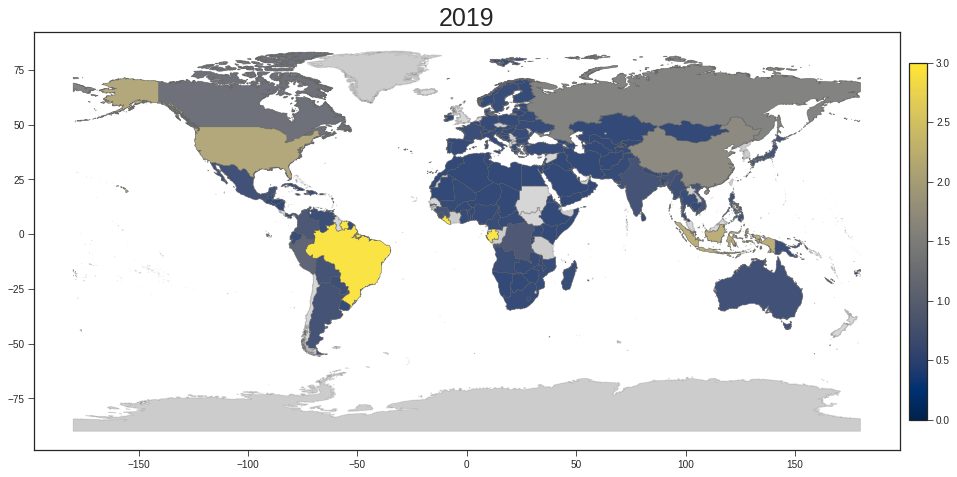

In [67]:
variable = '2019'
variable2 = '2018'
variable3 = '2017'
variable4 = '2016'
variable5 = '2015'

vmin, vmax = -0.5 , 3
figsize=(16, 16)
fig, ax = plt.subplots(1, figsize=(16, 16))
# Create colorbar as a legend

merged.plot(column=variable, cmap='gray', ax= ax, linewidth=0.9, edgecolor='0.4',norm=plt.Normalize(vmin=-1, vmax=0), legend=False, alpha=0.2)
merged2.plot(column=variable, cmap='cividis', ax= ax, linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=False, alpha=0.9)

# fig, ax = plt.subplots(2,2, figsize=(8, 8))
# Create colorbar as a legend

# merged.plot(column=variable2, cmap='Reds', linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add a title
# fig.suptitle('F.A.V.I. Index', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_title('2019', fontdict={'fontsize': '25', 'fontweight' : '3'})

sm = plt.cm.ScalarMappable(cmap = 'cividis', norm=plt.Normalize(vmin=0, vmax=vmax))
# add the colorbar to the figure
fig.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.01)
plt.style.use('seaborn-ticks')
figsize=(20, 20)
plt.savefig('plot_export2019.png', dpi=700, bbox_inches='tight', pad_inches=0)
plt.show()

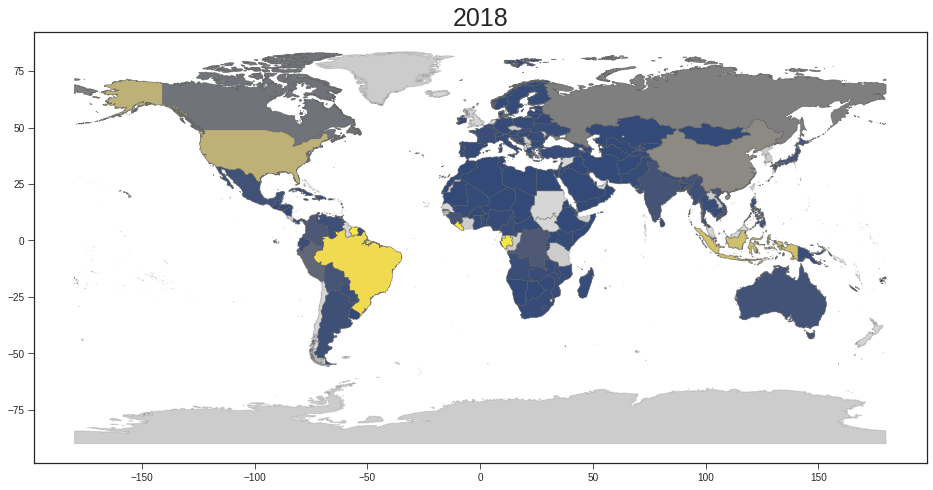

In [68]:
variable = '2019'
variable2 = '2018'
variable3 = '2017'
variable4 = '2016'
variable5 = '2015'

vmin, vmax = -0.5 , 3
figsize=(16, 16)
fig, ax = plt.subplots(1, figsize=(16, 16))
# Create colorbar as a legend

merged.plot(column=variable2, cmap='gray', ax= ax, linewidth=0.9, edgecolor='0.4',norm=plt.Normalize(vmin=-1, vmax=0), legend=False, alpha=0.2)
merged2.plot(column=variable2, cmap='cividis', ax= ax, linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=False, alpha=0.9)

# fig, ax = plt.subplots(2,2, figsize=(8, 8))
# Create colorbar as a legend

# merged.plot(column=variable2, cmap='Reds', linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add a title
# fig.suptitle('F.A.V.I. Index', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_title('2018', fontdict={'fontsize': '25', 'fontweight' : '3'})

# sm = plt.cm.ScalarMappable(cmap = 'cividis', norm=plt.Normalize(vmin=0, vmax=vmax))
# add the colorbar to the figure
# fig.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.01)
plt.style.use('seaborn-ticks')
figsize=(20, 20)
plt.savefig('plot_export2018.png', dpi=700, bbox_inches='tight', pad_inches=0)
plt.show()

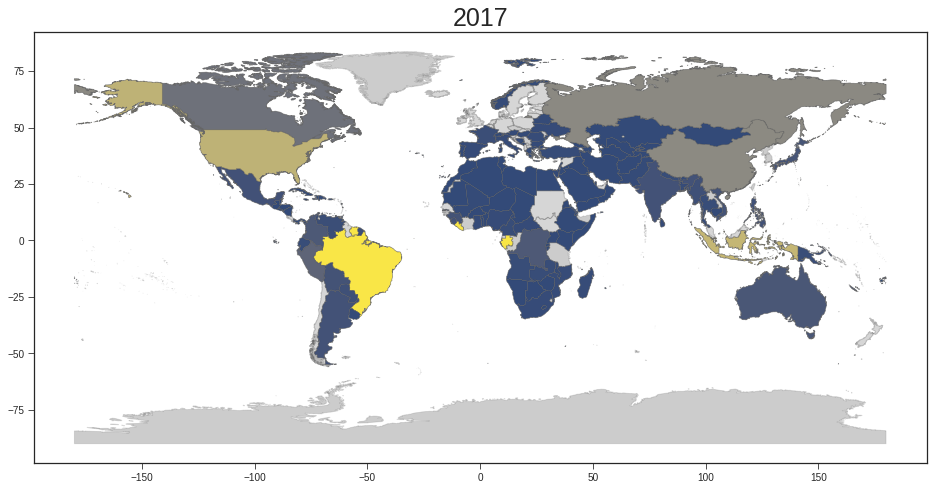

In [69]:
variable = '2019'
variable2 = '2018'
variable3 = '2017'
variable4 = '2016'
variable5 = '2015'

vmin, vmax = -0.5 , 3
figsize=(16, 16)
fig, ax = plt.subplots(1, figsize=(16, 16))
# Create colorbar as a legend

merged.plot(column=variable3, cmap='gray', ax= ax, linewidth=0.9, edgecolor='0.4',norm=plt.Normalize(vmin=-1, vmax=0), legend=False, alpha=0.2)
merged2.plot(column=variable3, cmap='cividis', ax= ax, linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=False, alpha=0.9)

# fig, ax = plt.subplots(2,2, figsize=(8, 8))
# Create colorbar as a legend

# merged.plot(column=variable2, cmap='Reds', linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add a title
# fig.suptitle('F.A.V.I. Index', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_title('2017', fontdict={'fontsize': '25', 'fontweight' : '3'})

# sm = plt.cm.ScalarMappable(cmap = 'cividis', norm=plt.Normalize(vmin=0, vmax=vmax))
# add the colorbar to the figure
# fig.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.01)
plt.style.use('seaborn-ticks')
figsize=(20, 20)
plt.savefig('plot_export2017.png', dpi=700, bbox_inches='tight', pad_inches=0)
plt.show()

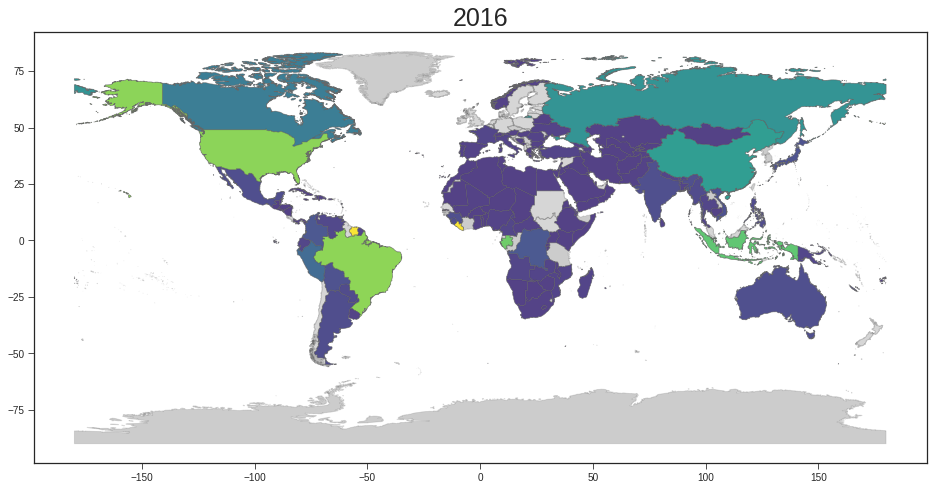

In [70]:
variable = '2019'
variable2 = '2018'
variable3 = '2017'
variable4 = '2016'
variable5 = '2015'

vmin, vmax = -0.5 , 3
figsize=(16, 16)
fig, ax = plt.subplots(1, figsize=(16, 16))
# Create colorbar as a legend

merged.plot(column=variable4, cmap='gray', ax= ax, linewidth=0.9, edgecolor='0.4',norm=plt.Normalize(vmin=-1, vmax=0), legend=False, alpha=0.2)
merged2.plot(column=variable4, cmap='viridis', ax= ax, linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=False, alpha=0.9)

# fig, ax = plt.subplots(2,2, figsize=(8, 8))
# Create colorbar as a legend

# merged.plot(column=variable2, cmap='Reds', linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add a title
# fig.suptitle('F.A.V.I. Index', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_title('2016', fontdict={'fontsize': '25', 'fontweight' : '3'})

# sm = plt.cm.ScalarMappable(cmap = 'cividis', norm=plt.Normalize(vmin=0, vmax=vmax))
# add the colorbar to the figure
# fig.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.01)
plt.style.use('seaborn-ticks')
figsize=(20, 20)
plt.savefig('plot_export2016.png', dpi=700, bbox_inches='tight', pad_inches=0)
plt.show()

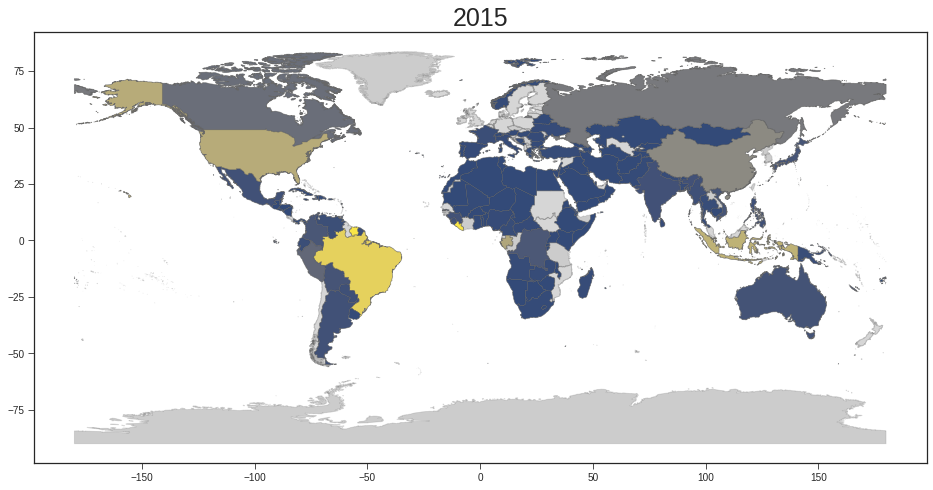

In [71]:
variable = '2019'
variable2 = '2018'
variable3 = '2017'
variable4 = '2016'
variable5 = '2015'

vmin, vmax = -0.5 , 3
figsize=(16, 16)
fig, ax = plt.subplots(1, figsize=(16, 16))
# Create colorbar as a legend

merged.plot(column=variable5, cmap='gray', ax= ax, linewidth=0.9, edgecolor='0.4',norm=plt.Normalize(vmin=-1, vmax=0), legend=False, alpha=0.2)
merged2.plot(column=variable5, cmap='cividis', ax= ax, linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax), legend=False, alpha=0.9)

# fig, ax = plt.subplots(2,2, figsize=(8, 8))
# Create colorbar as a legend

# merged.plot(column=variable2, cmap='Reds', linewidth=0.4, edgecolor='0.4',norm=plt.Normalize(vmin=vmin, vmax=vmax))
# add a title
# fig.suptitle('F.A.V.I. Index', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.set_title('2015', fontdict={'fontsize': '25', 'fontweight' : '3'})

# sm = plt.cm.ScalarMappable(cmap = 'cividis', norm=plt.Normalize(vmin=0, vmax=vmax))
# add the colorbar to the figure
# fig.colorbar(sm, orientation='vertical', fraction=0.02, pad=0.01)
plt.style.use('seaborn-ticks')
figsize=(20, 20)
plt.savefig('plot_export2015.png', dpi=700, bbox_inches='tight', pad_inches=0)
plt.show()